In [9]:
from PIL import Image, ImageEnhance, ImageOps
import os
import numpy as np
import pandas as pd

# Set wd to current file's location
path = 'C:/ARCHIVIO/2 - Magistrale/Semestre 3/Advanced statistical modelling fot Big Data/Progetto/Cells'

In [10]:
names0 = os.listdir(os.path.join(path, 'data', 'Uninfected'))
names1 = os.listdir(os.path.join(path, 'data', 'Parasitized'))

img0 = Image.open(os.path.join(path, 'data', 'Uninfected', names0[1]))
img1 = Image.open(os.path.join(path, 'data', 'Parasitized', names1[1]))

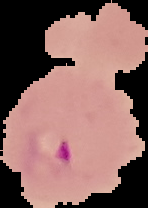

In [11]:
# Raw image
img1

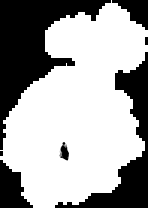

In [12]:
# Create B/W contrast enhanced
opt = img1.convert(mode='L')
enhancer = ImageEnhance.Contrast(opt)
opt = enhancer.enhance(10)
opt

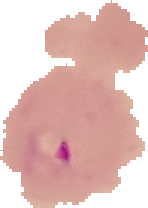

In [13]:
# Create Mask
mask = img1
pixels_mask = mask.load()
for i in range(mask.size[0]):
    for j in range(mask.size[1]):
        if pixels_mask[i,j] == (0,0,0):
            pixels_mask[i,j] = (255, 255, 255)
mask

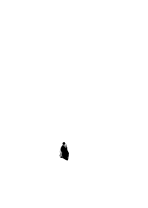

In [14]:
# Join Mask over B/W
pixels_opt = opt.load()
for i in range(mask.size[0]):
    for j in range(mask.size[1]):
        if pixels_mask[i,j] == (255, 255, 255):
            pixels_opt[i,j] = 255
opt

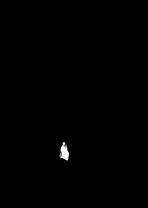

In [15]:
# Invert
opt = ImageOps.invert(opt)
opt